In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [8]:
import numpy as np
import pandas as pd
import os
#data = pd.read_excel("Full_Data_Without_FFA.xlsx",sheet_name="data",engine="openpyxl")
data = pd.read_csv(r"D:\Python\20-hour-Python\College\FDS\Copy of NEW(1).csv")
data.head(2)

,Orange lesion,Large Subretinal haem,Serous PED,Haemorrhagic PED,Sharp Peaked PED,Notched PED,Double Layer Sign,CME,Multiple PED,Gold Standard
0,1,0,1,0,1,1,1,0,1,1
1,1,0,1,0,1,1,1,0,1,1


In [9]:
# Step 1: Clean column names
data.columns = [col.replace(" ", "_") for col in data.columns]

# Step 2: Split data
X = data.drop(columns=["Gold_Standard"])
y = data["Gold_Standard"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [10]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [12]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 88.89%


In [13]:
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[26  1]
 [ 5 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90        27
           1       0.96      0.81      0.88        27

    accuracy                           0.89        54
   macro avg       0.90      0.89      0.89        54
weighted avg       0.90      0.89      0.89        54



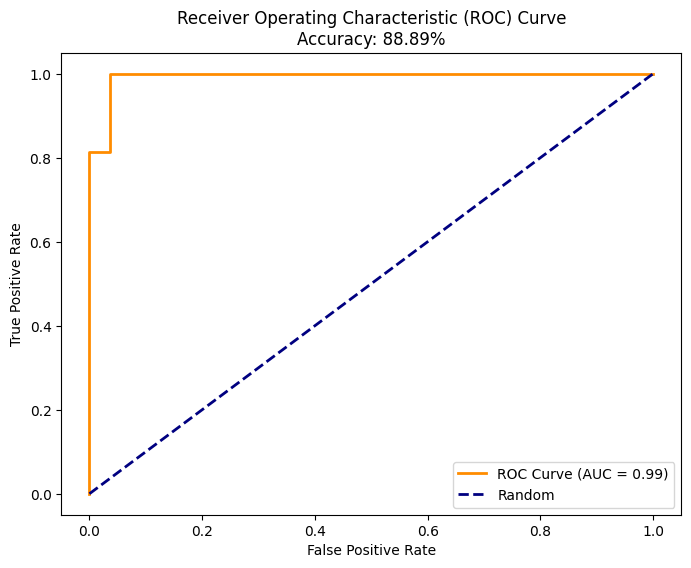

In [14]:
# Plot ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
    accuracy * 100))
plt.legend(loc="lower right")
plt.show()